<a href="https://colab.research.google.com/github/Nniichha/229352-StatisticalLearning/blob/main/229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [2]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-23 15:02:02--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-23 15:02:02 (9.18 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-23 15:02:02--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  29

In [3]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [4]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [5]:
# TODO: enter code here

# 1. Center ข้อมูล สมมติว่า data_c คือ normalized (centered) data
data_c = data - np.mean(data, axis=0)
# 2. หา covariance matrix
Sigma = np.cov(data_c, rowvar=False)
# 3. Decompose the covariance matrix UDU^T
eigenvals, eigenvecs = np.linalg.eigh(Sigma)
# 4. ดึง column ของ U ที่ประกอบไปด้วย eigenvector สองตัวที่มีค่า eigenvalue สูงที่สุด
U2 = eigenvecs[:, -2:]
# 5. เอา data_c ไปทำ projection ทิศทางของ eigenvector ใน U
data_2d = data_c @ U2
# Result: a (50,2) matrix


#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [6]:
#TODO (optional): enter code here
pca = PCA(n_components=2)
data_sklearn = pca.fit_transform(data_c)

# เทียบว่าต่างกันแค่สัญลักษณ์ +/-
np.allclose(np.abs(data_2d), np.abs(data_sklearn))  # ควรได้ True


False

#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

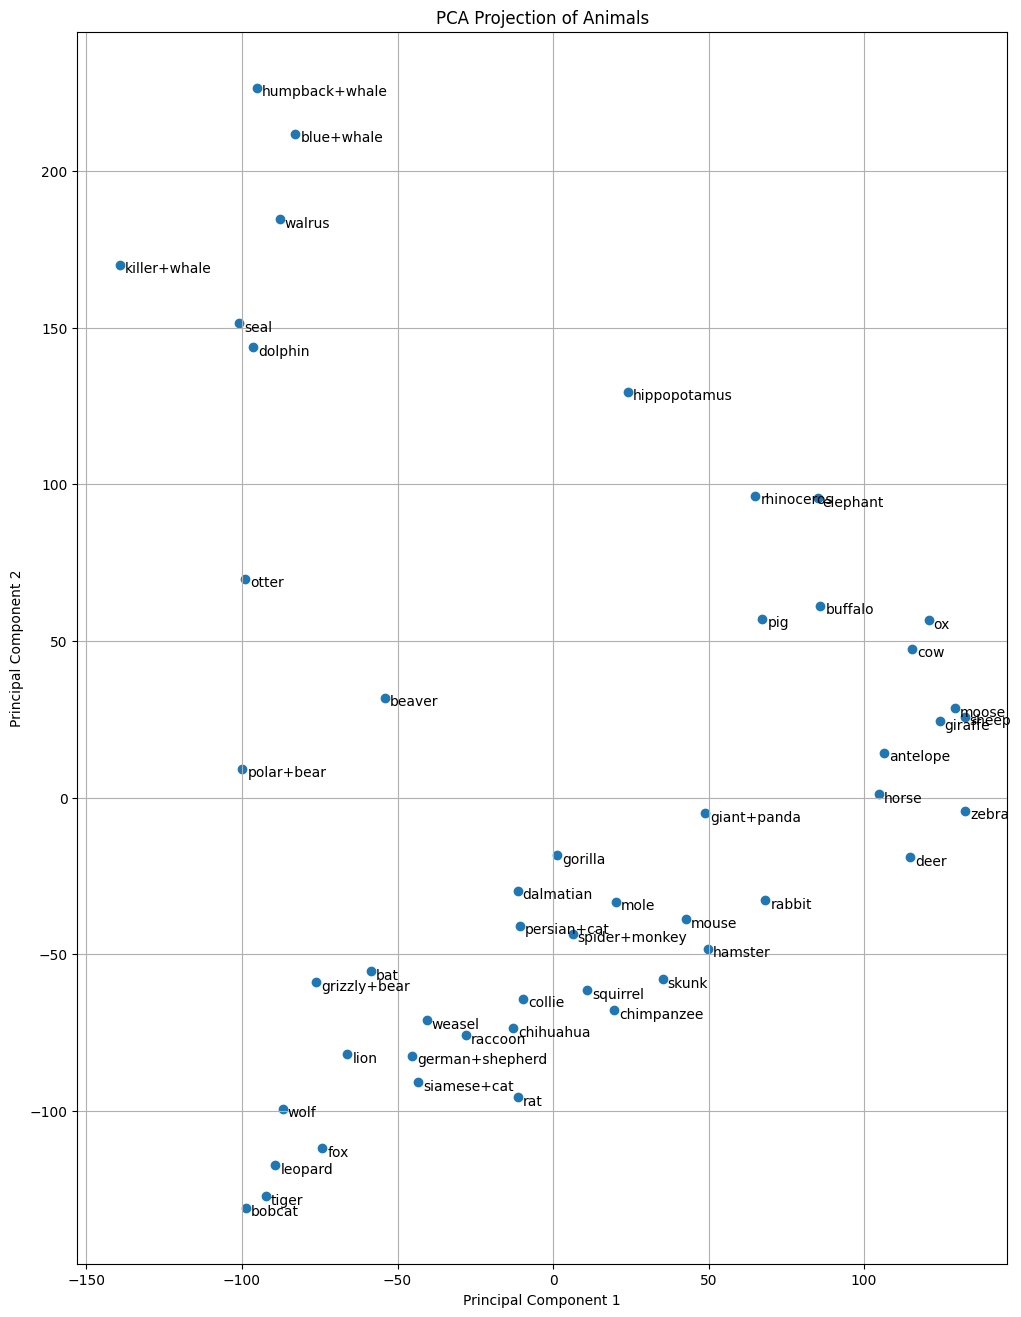

In [7]:
# กำหนดขนาดของรูป
plt.figure(figsize=(12,16))
plt.scatter(data_2d[:, 0], data_2d[:, 1])
# จงเติม argument ที่เหมาะสมในวงเล็บข้างล่างนี้
# รูปแบบของฟังก์ชันคือ plt.scatter(numpy array ของ x-coordinate, numpy array ของ y-coordinate)
#TODO: 1st column of your 50x2 matrix, #TODO: 2nd column of your 50x2 matrix )

# for loop เพื่อใส่คำกำกับ (annotate) ชื่อสัตว์ของแต่ละจุด วนให้ครบสัตว์ทุกชนิดที่อยู่ใน classes
# ใส่ numpy array ที่ผ่านการทำ PCA แล้วลงในตำแหน่งที่ระบุเพื่อบอกพิกัดที่ต้องวางคำกำกับ
for i in range(50):
    plt.annotate(classes[i,1], xy=(data_2d[i,0], data_2d[i,1]), xytext=(5, -8), textcoords='offset pixels')

plt.title("PCA Projection of Animals")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

1. กลุ่มสัตว์ที่มุมขวาบน ตัวอย่างเช่น elephant, rhinoceros, cow, ox, buffalo, pig, giraffe, moose มีลักษณะที่เหมือนกันคือ เป็นสัตว์กินพืชขนาดใหญ่
มีลำตัวแข็งแรง เดินด้วย 4 เท้า
มักอาศัยในทุ่งหญ้า ซาฟารี หรือฟาร์ม
ไม่มีพฤติกรรมการล่าเหยื่อ
หลายตัวถูกนำมาใช้ในงานเกษตร หรือเป็นสัตว์ในสวนสัตว์
2.  กลุ่มมุมบนซ้าย ตัวอย่างเช่น blue whale, humpback whale, killer whale, dolphin, seal, walrus, otter
มีลักษณะที่เหมือนกันคือ เป็นสัตว์เลี้ยงลูกด้วยนมที่อาศัยอยู่ในนำทะเล
หายใจด้วยปอด ต้องขึ้นมาเหนือน้ำเป็นระยะ
ว่ายน้ำเก่งและมีลำตัวเพรียว
ไม่มีขาเดินบนบก (หรือเดินได้น้อยมาก เช่น seal)
3. กลุ่มกลางล่าง ตัวอย่างเช่น persian cat, siamese cat, chihuahua, german shepherd, rat, mouse, hamster
มีลักษณะที่เหมือนกันคือ เป็นสัตว์เลี้ยงขนาดเล็กถึงกลาง
อาศัยอยู่ใกล้มนุษย์หรือในบ้าน
ไม่ใช่นักล่าโดยธรรมชาติ
เคลื่อนไหวคล่องตัว แต่ไม่เน้นความแข็งแรง
4. กลุ่มมุมซ้ายล่าง ตัวอย่างเช่น tiger, leopard, wolf, fox, bobcat, lion, grizzly bear
มีลักษณะที่เหมือนกันคือ เป็นสัตว์นักล่าที่อาศัยในป่า
เป็นสัตว์กินเนื้อ (Carnivores)
มีฟันเขี้ยวและเล็บคมสำหรับล่าเหยื่อ
คล่องแคล่ว แข็งแรง และมักล่าเป็นฝูง (เช่น wolf)